In [1]:
import warnings
warnings.filterwarnings('ignore')

First import two absolute standard libraries: numpy, for numerics and pandas for data in tabular form.

In [2]:
import numpy as np
import pandas as pd

## Anonymous functions: lambda (λ)

In [3]:
lambda x : x**2

<function __main__.<lambda>(x)>

is the same as

In [4]:
def mysq(x):
    return(x**2)

 but does not give a name to the function. It comes in handy when we are doing a simple computation once.
 
 Note that

In [5]:
list(map(mysq, range(5)))

[0, 1, 4, 9, 16]

and

In [6]:
list(map(lambda x : x**2, range(5)))

[0, 1, 4, 9, 16]

In short, `lambda x : x**2` defines a function $\lambda : x \to x^2$ without givining it a name. It is only useful when we want to evaluate a simple function without bothering to clutter our name-space with a bespoke functions that is only going to be used once or twice.

As an example of when it can be useful, aggregate on a column and calculate the sum of a column in millions (sum/1000000).

In [7]:
PBS = pd.read_csv('data/tsibbledata/PBS.csv')
PBS.Month = pd.to_datetime(PBS.Month, format="%Y %b")
PBS

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991-07-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991-08-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991-09-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991-10-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991-11-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0
...,...,...,...,...,...,...,...,...,...
67591,2008-02-01,General,Safety net,Z,NaN,Z,Z,135,1591.0
67592,2008-03-01,General,Safety net,Z,NaN,Z,Z,15,276.0
67593,2008-04-01,General,Safety net,Z,NaN,Z,Z,11,165.0
67594,2008-05-01,General,Safety net,Z,NaN,Z,Z,21,278.0


If you want to calcuate several statistics on a grouped variable you can use **named tuples**, `new_column = ('Column name', 'statistic function')`, where 'Column name' is the column you want to compute the 'statistics function' on. Suppose that we want to calculate the two statstics 'Total cost per month in million dollars' ($\lambda x \to \sum(x)/1000000$) and 'total cost per month in dollars'

In [8]:
a10 = (
    PBS
       .query('ATC2 == "A10"')
       .groupby('Month')
       .agg(Total_Cost_Millions = ('Cost', lambda x : sum(x)/1000000 ),
            Total_Cost=('Cost', 'sum'))
)
a10

,Total_Cost_Millions,Total_Cost
Month,,
1991-07-01,3.526591,3526591.0
1991-08-01,3.180891,3180891.0
1991-09-01,3.252221,3252221.0
1991-10-01,3.611003,3611003.0
1991-11-01,3.565869,3565869.0
...,...,...
2008-02-01,21.654285,21654285.0
2008-03-01,18.264945,18264945.0
2008-04-01,23.107677,23107677.0


## Time-series seaonality

For a10, the `.index` is of the data type `dtype='datetime64[ns]'`.

In [9]:
a10.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='Month', length=204, freq=None)

This has some build in **attributes** such as `.year`, `.month` and `.day` that are useful for seasonal time series. 

It also has some bound methodds like month_name().

Let us `.assign` this to separate columns:

In [10]:
a10 = ( 
 a10
 .assign(
     year = a10.index.year,
     month = a10.index.month,
     month_name = a10.index.month_name().str[:3],  # just the first three letters of the month name
     day = a10.index.dayofyear
     )
)


In [11]:
a10

,Total_Cost_Millions,Total_Cost,year,month,month_name,day
Month,,,,,,
1991-07-01,3.526591,3526591.0,1991,7,Jul,182
1991-08-01,3.180891,3180891.0,1991,8,Aug,213
1991-09-01,3.252221,3252221.0,1991,9,Sep,244
1991-10-01,3.611003,3611003.0,1991,10,Oct,274
1991-11-01,3.565869,3565869.0,1991,11,Nov,305
...,...,...,...,...,...,...
2008-02-01,21.654285,21654285.0,2008,2,Feb,32
2008-03-01,18.264945,18264945.0,2008,3,Mar,61
2008-04-01,23.107677,23107677.0,2008,4,Apr,92


## Plotting in python

There are many libraries for plotting in python. The most low-level and flexible is `matplot`. The only up-to-date modern object-oriented plotting library I know of is `seaborn.objects`.

The seaborn.object is deeply influenced by R's ggplot, and anyone who is used to ggplot should find it relatively easy to migrate.

To plot a10 in ggplot, with a line in a different colour for each year you would do

With seaborn.objects we do

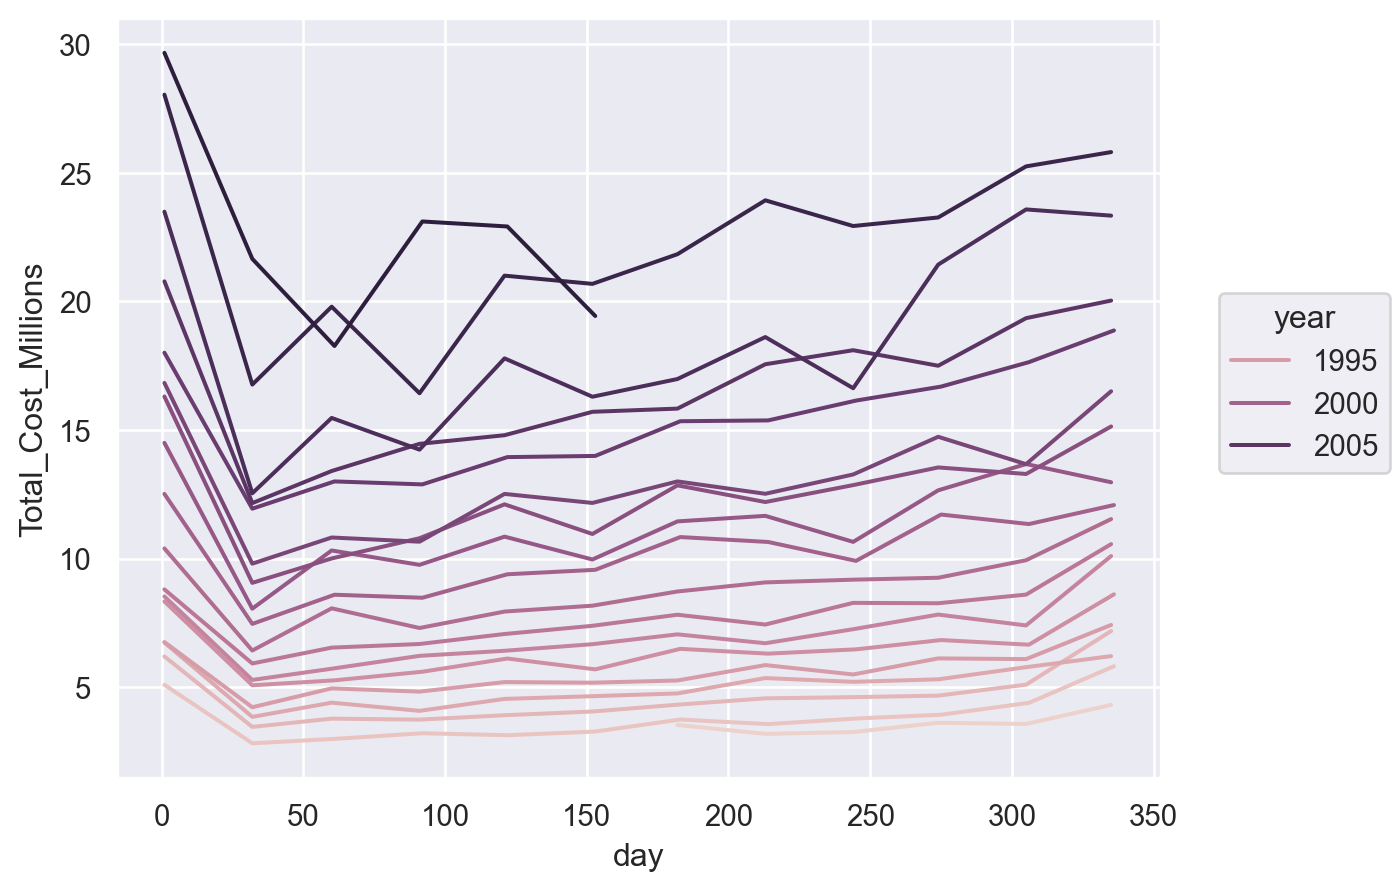

In [12]:
import seaborn.objects as so
(
 so.Plot(a10, x='day', y='Total_Cost_Millions', color='year')
 .add(so.Line())
 )

Just like in ggplot we can add layers with their own mappings and their own data

In [13]:
txtpd = (
    a10.groupby('year')
    .agg(last_day = ('day', 'last'),
         cost_last_day = ('Total_Cost_Millions', 'last'))
    .reset_index()
    )
txtpd

,year,last_day,cost_last_day
0,1991,335,4.306371
1,1992,336,5.810549
2,1993,335,7.179962
3,1994,335,6.204593
4,1995,335,7.416598
5,1996,336,8.606937
6,1997,335,10.096233
7,1998,335,10.558939
8,1999,335,11.532974
9,2000,336,12.079132


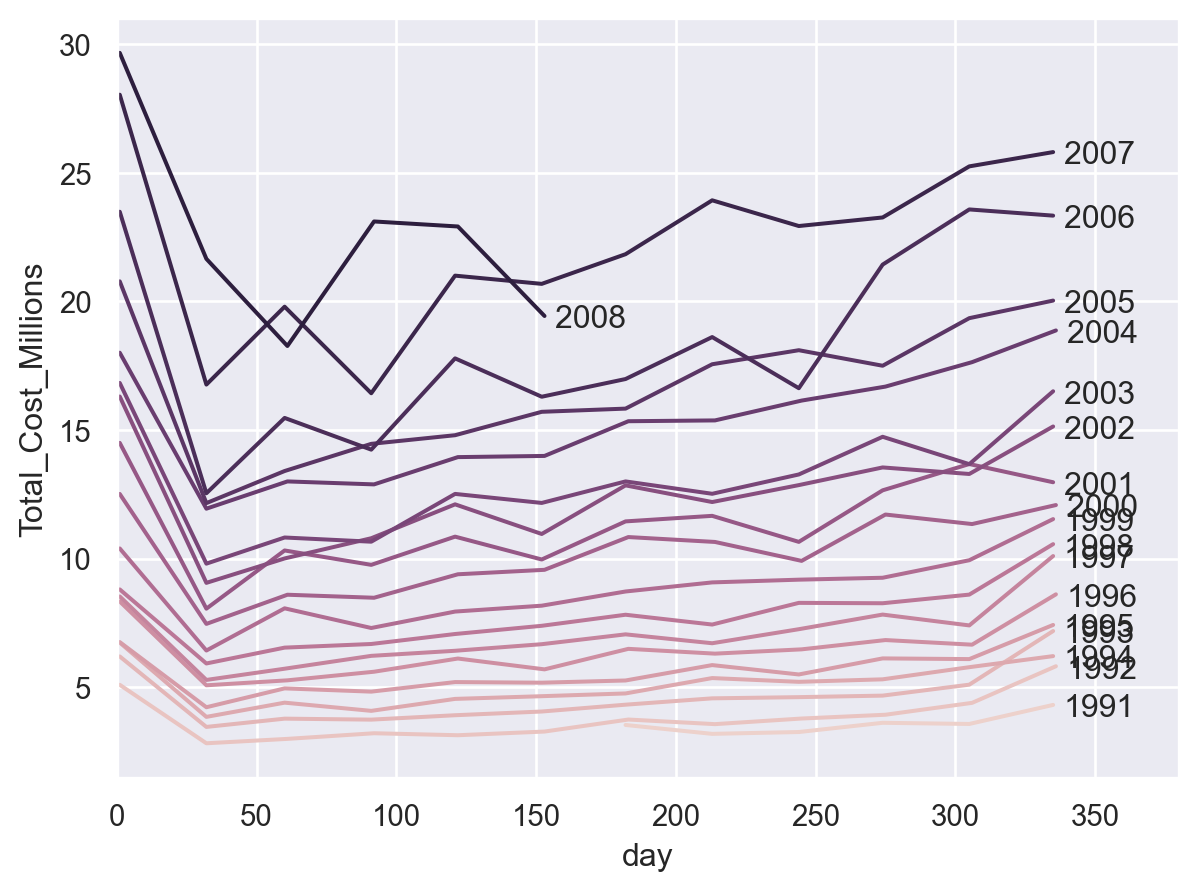

In [14]:
(
 so.Plot()
 .add(so.Line(), data = a10,
      x='day', y='Total_Cost_Millions', color='year',
      legend=False)
 .add(so.Text(halign = 'left'), data = txtpd,
      x='last_day', y='cost_last_day', text ='year')
 .limit(x = (0,380))
)

### Facet plot

In [15]:
p = (
so.Plot(data = a10, x='year', y='Total_Cost_Millions')
 .add(so.Line())
)

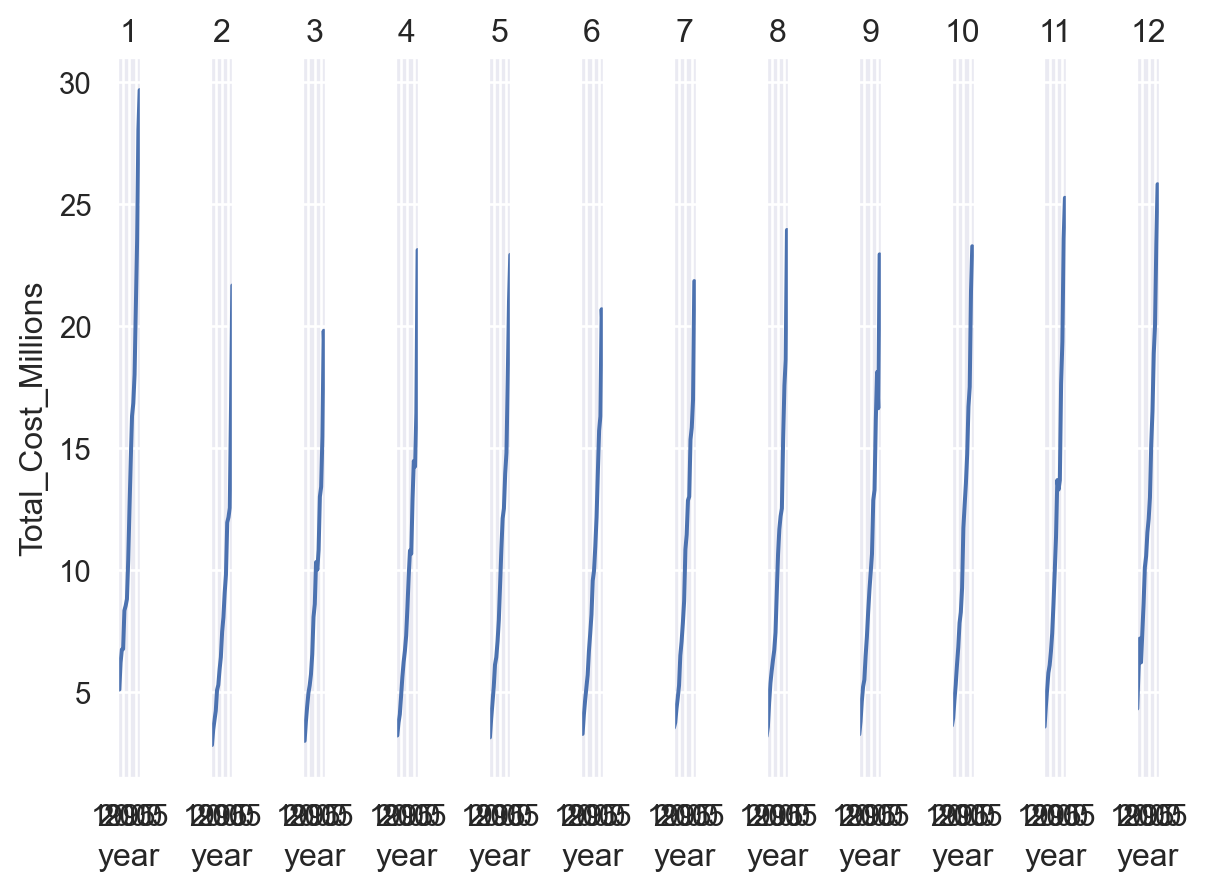

In [16]:
from matplotlib.ticker import FixedFormatter
empty_formatter = FixedFormatter([])
p.facet('month')

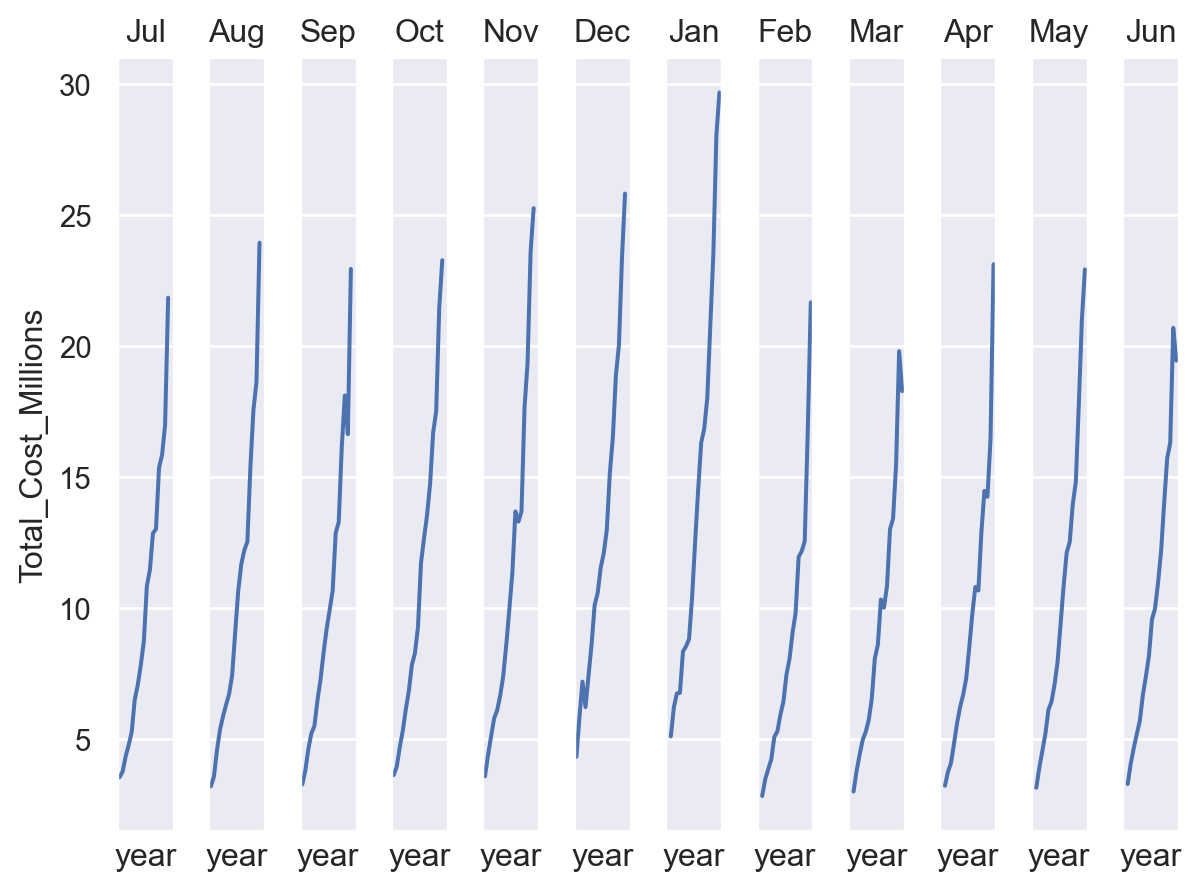

In [17]:
p.facet('month_name').scale(x=so.Continuous().tick(at = []))